# Convert between color spaces


In [17]:
import numpy as np
np.set_printoptions(threshold=np.inf)
import cv2
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib

(<matplotlib.axes._subplots.AxesSubplot at 0x123d84d68>,
 Text(0.5, 1.0, 'image -> gray -> rgb'))

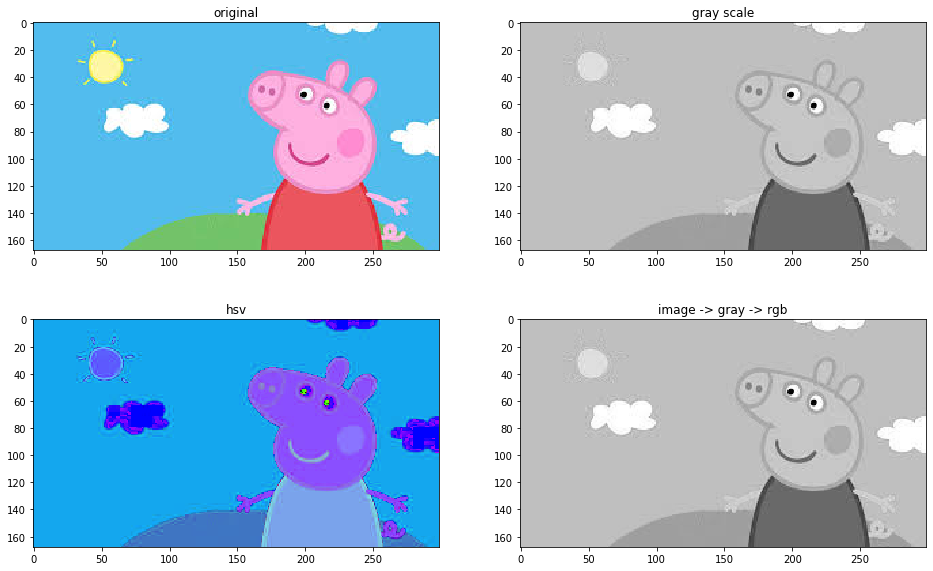

In [2]:
image = cv2.imread('peppa.jpeg')

#to gray
gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
#to HSV
hsv = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)
# gray to color
rgb = cv2.cvtColor(gray, cv2.COLOR_GRAY2RGB)

plt.figure(figsize=(16, 10))
plt.subplot(2,2,1), plt.imshow(image[...,::-1]), plt.title("original")
plt.subplot(2,2,2), plt.imshow(gray, cmap='gray'), plt.title("gray scale")
plt.subplot(2,2,3), plt.imshow(hsv), plt.title("hsv")
plt.subplot(2,2,4), plt.imshow(rgb[...,::-1]), plt.title("image -> gray -> rgb")



In [3]:
#why rgb is not colored?
rgb.shape

(168, 299, 3)

In [9]:
gray

array([[191, 191, 191, 191, 191, 191, 191, 191, 191, 191, 191, 191, 191,
        191, 191, 191, 191, 191, 191, 191, 191, 191, 191, 191, 191, 191,
        191, 191, 191, 191, 191, 191, 191, 191, 191, 191, 191, 191, 191,
        191, 191, 191, 191, 191, 191, 191, 191, 191, 191, 191, 191, 191,
        191, 191, 191, 191, 191, 191, 191, 191, 191, 191, 191, 191, 191,
        191, 191, 191, 191, 191, 191, 191, 191, 191, 191, 191, 191, 191,
        191, 191, 191, 191, 191, 191, 191, 191, 191, 191, 191, 191, 191,
        191, 191, 191, 191, 191, 191, 191, 191, 191, 191, 191, 191, 191,
        191, 191, 191, 191, 191, 191, 191, 191, 191, 191, 191, 191, 191,
        191, 191, 191, 191, 191, 191, 191, 191, 191, 191, 191, 191, 191,
        191, 191, 191, 191, 191, 191, 191, 191, 191, 191, 191, 191, 191,
        191, 191, 191, 191, 191, 191, 191, 191, 191, 191, 191, 191, 191,
        191, 191, 191, 191, 191, 191, 191, 191, 191, 191, 191, 191, 191,
        191, 191, 191, 191, 191, 191, 191, 191, 191

In [14]:
np.allclose(gray,rgb[...,0])

True

In [15]:
#why hsv color is "weird?"

#let's save it to disk
cv2.imwrite('hsv.jpeg', hsv)


True

![alt text](hsv.jpeg "Logo Title Text 1")


### Note: Opencv only display image as RGB iamge, matplotlib (BGR) 

--> in order to display hsv, we must convert it to RGB/BGR first


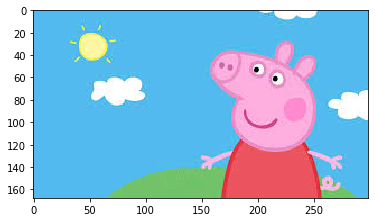

In [32]:
rgb_from_hsv = cv2.cvtColor(hsv, cv2.COLOR_HSV2RGB)

plt.imshow(rgb_from_hsv[...,::-1])

# Intensity to color transformation

Colormaps

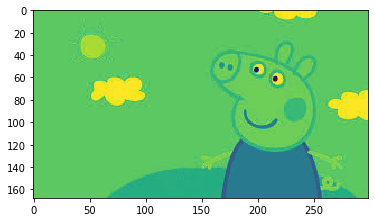

In [49]:
plt.imshow(gray, cmap='')

In [55]:
cm = matplotlib.cm.get_cmap('viridis', 12)
print(cm)

In [46]:
cm(0.5)   #return an RGBA value, input: range 0-1

(0.9097600944545455, 0.8391406083636364, 0.7998023305454546, 1.0)

In [57]:
print(cm.colors)

[[0.267004 0.004874 0.329415 1.      ]
 [0.283072 0.130895 0.449241 1.      ]
 [0.262138 0.242286 0.520837 1.      ]
 [0.220057 0.343307 0.549413 1.      ]
 [0.177423 0.437527 0.557565 1.      ]
 [0.143343 0.522773 0.556295 1.      ]
 [0.119512 0.607464 0.540218 1.      ]
 [0.166383 0.690856 0.496502 1.      ]
 [0.319809 0.770914 0.411152 1.      ]
 [0.525776 0.833491 0.288127 1.      ]
 [0.762373 0.876424 0.137064 1.      ]
 [0.993248 0.906157 0.143936 1.      ]]


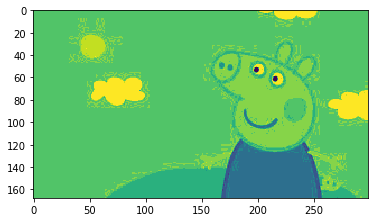

In [58]:
plt.imshow(gray, cmap=cm)

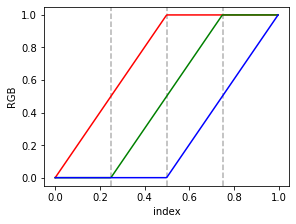

In [63]:
cdict = {'red':   [[0.0,  0.0, 0.0],
                   [0.5,  1.0, 1.0],
                   [1.0,  1.0, 1.0]],
         'green': [[0.0,  0.0, 0.0],
                   [0.25, 0.0, 0.0],
                   [0.75, 1.0, 1.0],
                   [1.0,  1.0, 1.0]],
         'blue':  [[0.0,  0.0, 0.0],
                   [0.5,  0.0, 0.0],
                   [1.0,  1.0, 1.0]]}

newcmp = matplotlib.colors.LinearSegmentedColormap('testCmap', segmentdata=cdict, N=256)

def plot_linearmap(cdict):
    newcmp = matplotlib.colors.LinearSegmentedColormap('testCmap', segmentdata=cdict, N=256)
    rgba = newcmp(np.linspace(0, 1, 256))
    fig, ax = plt.subplots(figsize=(4, 3), constrained_layout=True)
    col = ['r', 'g', 'b']
    for xx in [0.25, 0.5, 0.75]:
        ax.axvline(xx, color='0.7', linestyle='--')
    for i in range(3):
        ax.plot(np.arange(256)/256, rgba[:, i], color=col[i])
    ax.set_xlabel('index')
    ax.set_ylabel('RGB')
    plt.show()

plot_linearmap(cdict)

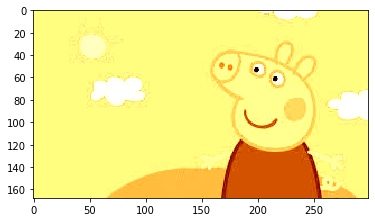

In [64]:
plt.imshow(gray, cmap=newcmp)

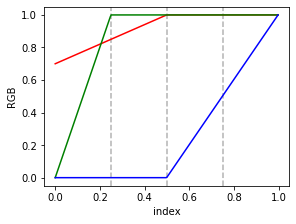

In [73]:
cdict = {'red':   [[0.0,  0.5, 0.7],
                   [0.5,  1.0, 1.0],
                   [1.0,  1.0, 1.0]],
         'green': [[0.0,  0.0, 0.0],
                   [0.25, 1.0, 1.0],
                   [0.75, 1.0, 1.0],
                   [1.0,  1.0, 1.0]],
         'blue':  [[0.0,  0.0, 0.0],
                   [0.5,  0.0, 0.0],
                   [1.0,  1.0, 1.0]]}

cdict['red'] = [[0.0,  0.5, 0.7],
                [0.5,  1.0, 0.9],
                [1.0,  1.0, 1.0]]

newcmp2 = matplotlib.colors.LinearSegmentedColormap('testCmap', segmentdata=cdict, N=256)
plot_linearmap(cdict)

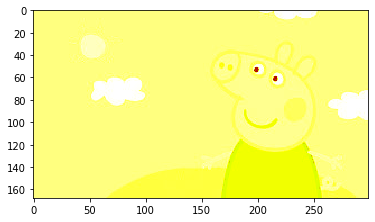

In [74]:
plt.imshow(gray, cmap=newcmp2)